# Data Cleaning and Transformation

In the last chapter, we created functions to download and save the raw data. In this chapter, we take steps to find and clean bad data, and transform it to a structure that is suitable for modeling. We begin by reading in the raw local data with the `run` function.

### Important note on importing from solutions

Because this is a new chapter, you will need to import functions from the solutions.py file that were defined in the previous chapter. Continue to comment out the import statements that appear after an exercise so that you can practice them. Alternatively, you can put all of your solutions in a solutions2.py file and change the import statements to import your functions.

In [2]:
import pandas as pd
from solution2_sho import run
data = run()
data['world_cases'].head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23,1/7/23,1/8/23,1/9/23,1/10/23,1/11/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207627,207654,207715,207748,207766,207766,207819,207841,207866,207900
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333812,333812,333818,333850,333887,333916,333947,333948,333995,333995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271229,271230,271236,271244,271250,271254,271254,271255,271262,271268


In [3]:
data['usa_cases'].head(3)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23,1/7/23,1/8/23,1/9/23,1/10/23,1/11/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,18961,18961,19205,19205,19205,19205,19205,19205,19205,19318
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,67496,67496,68182,68182,68182,68182,68182,68182,68182,68518
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7027,7027,7120,7120,7120,7120,7120,7120,7120,7188


## Selecting the correct columns

Take a look at the world and USA DataFrames above and you'll notice a difference in the names and number of columns. The following exercise describes how to select the columns.

### Exercise 6

<span style="color:green; font-size:16px">Write a function that accepts a single DataFrame and selects the `"Country/Region"` column for the world DataFrames, `"Province_State"` column for the USA DataFrames, and all the date columns for both. Return a DataFrame with just those columns. Assume that the column names always remain the same for each dataset.</span>

In [74]:
def select_columns(df):
    """
    Selects the Country/Region column for world DataFrames and
    Province_State for USA
    
    Parameters
    ----------
    df : DataFrame
    
    Returns
    -------
    df : DataFrame
    
    """
    cols=df.columns
    labels =['Country/Region','Province_State']
    filt1 =cols.isin(labels)
    filt2 =cols.str.count('/')==2
    filt = filt1 | filt2
    return df.loc[:,filt]

Let's use this function to select the columns and output from both the world and USA DataFrames.

In [75]:
#from solutions import select_columns
select_columns(data['world_cases']).head(3)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,12/6/22,12/7/22,12/8/22,12/9/22,12/10/22,12/11/22,12/12/22,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23,1/7/23,1/8/23,1/9/23,1/10/23,1/11/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,5,5,5,8,8,8,8,...,205391,205506,205541,205612,205612,205802,205830,205907,206073,206133,206145,206206,206273,206331,206414,206465,206504,206543,206603,206702,206743,206788,206879,206912,206943,207037,207084,207146,207190,207239,207262,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627,207654,207715,207748,207766,207766,207819,207841,207866,207900
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,...,333293,333305,333316,333322,333330,333330,333338,333343,333360,333381,333391,333408,333413,333455,333472,333490,333491,333521,333533,333535,333567,333591,333613,333635,333635,333650,333653,333686,333708,333708,333731,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812,333812,333818,333850,333887,333916,333947,333948,333995,333995
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,...,271041,271050,271057,271061,271061,271079,271082,271090,271096,271100,271102,271107,271113,271122,271128,271135,271140,271146,271146,271147,271149,271156,271156,271156,271168,271174,271179,271182,271186,271190,271193,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229,271230,271236,271244,271250,271254,271254,271255,271262,271268


In [35]:
select_columns(data['usa_cases']).head(3)

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,12/6/22,12/7/22,12/8/22,12/9/22,12/10/22,12/11/22,12/12/22,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23,1/7/23,1/8/23,1/9/23,1/10/23,1/11/23
0,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18612,18612,18612,18612,18612,18612,18612,18680,18680,18680,18680,18680,18680,18680,18752,18752,18752,18752,18752,18752,18752,18847,18847,18847,18847,18847,18847,18847,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,19205,19205,19205,19205,19205,19205,19205,19318
1,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,66480,66480,66480,66480,66480,66480,66480,66730,66730,66730,66730,66730,66730,66730,66951,66951,66951,66951,66951,66951,66951,67221,67221,67221,67221,67221,67221,67221,67496,67496,67496,67496,67496,67496,67496,67496,67496,67496,67496,67496,67496,67496,68182,68182,68182,68182,68182,68182,68182,68518
2,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6968,6968,6968,6968,6968,6968,6968,6980,6980,6980,6980,6980,6980,6980,6989,6989,6989,6989,6989,6989,6989,7007,7007,7007,7007,7007,7007,7007,7027,7027,7027,7027,7027,7027,7027,7027,7027,7027,7027,7027,7027,7027,7120,7120,7120,7120,7120,7120,7120,7188


### Updating the `run` function

After each step in this chapter, we'll update our `run` function to pass each DataFrame through the newly created function. Each `run` function will be uniquely labeled with an ending integer.

### Exercise 7

<span style="color:green; font-size:16px">Update the `run` function to include the above step.</span>

In [48]:
GROUPS = "world", "usa"
KINDS = "deaths", "cases"
from solution2_sho import read_local_data

def run2():
    """
    Run all cleaning and transformation steps
    
    Returns
    -------
    Dictionary of DataFrames
    """
    #upload data
    directory='data/raw'
    data ={}
    for group in GROUPS:
        for kind in KINDS:
            data[f'{group}_{kind}']= read_local_data(group,kind,directory)
            #data[f'{group}_{kind}']=df
            data[f'{group}_{kind}']=select_columns(data[f'{group}_{kind}'])
    return data

In [49]:
#from solutions import run2
data = run2()
data['usa_cases'].head(3)

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,12/6/22,12/7/22,12/8/22,12/9/22,12/10/22,12/11/22,12/12/22,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23,1/7/23,1/8/23,1/9/23,1/10/23,1/11/23
0,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18612,18612,18612,18612,18612,18612,18612,18680,18680,18680,18680,18680,18680,18680,18752,18752,18752,18752,18752,18752,18752,18847,18847,18847,18847,18847,18847,18847,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,19205,19205,19205,19205,19205,19205,19205,19318
1,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,66480,66480,66480,66480,66480,66480,66480,66730,66730,66730,66730,66730,66730,66730,66951,66951,66951,66951,66951,66951,66951,67221,67221,67221,67221,67221,67221,67221,67496,67496,67496,67496,67496,67496,67496,67496,67496,67496,67496,67496,67496,67496,68182,68182,68182,68182,68182,68182,68182,68518
2,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6968,6968,6968,6968,6968,6968,6968,6980,6980,6980,6980,6980,6980,6980,6989,6989,6989,6989,6989,6989,6989,7007,7007,7007,7007,7007,7007,7007,7027,7027,7027,7027,7027,7027,7027,7027,7027,7027,7027,7027,7027,7027,7120,7120,7120,7120,7120,7120,7120,7188


## Updating area names 

In both groups of data, there are a few area names that can be updated so that they use a more common name. There are three cruise ships, which we will replace with the string "Cruise Ship". Also, since the United States has its own summary table, we can drop it from the world DataFrames.

### Exercise 8

<span style="color:green; font-size:16px">Write a function that uses the DataFrame `replace` method to replace the names in the first column with the provided dictionary below. Drop all rows from the "US" from the world DataFrame.</span>

In [91]:
REPLACE_AREA = {
    "Korea, South": "South Korea",
    "Taiwan*": "Taiwan",
    "Burma": "Myanmar",
    "Holy See": "Vatican City",
    "Diamond Princess": "Cruise Ship",
    "Grand Princess": "Cruise Ship",
    "MS Zaandam": "Cruise Ship"
}

def update_areas(df):
    """
    Replace a few of the area names using the REPLACE_AREA dictionary.
    
    Parameters
    ----------
    df : DataFrame
    
    Returns
    -------
    df : DataFrame
    """
    first_col=df.columns[0]
    df.replace(REPLACE_AREA,inplace=True)
    filt=df[first_col] !='US'
    df=df[filt]
    return df

### Exercise 9

<span style="color:green; font-size:16px">Update the `run` function to include the above step.</span>

In [94]:
def run3():
    """
    Run all cleaning and transformation steps
    
    Returns
    -------
    Dictionary of DataFrames
    """
    directory='data/raw'
    data ={}
    for group in GROUPS:
        for kind in KINDS:
            df= read_local_data(group,kind,directory)
            df=select_columns(df)
            df=update_areas(df)
            data[f'{group}_{kind}']=df
    return data

We verify our function by searching for the cruise ships.

In [95]:
#from solutions import run3
data = run3()
data['usa_cases'].query("Province_State == 'Cruise Ship'")

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,12/6/22,12/7/22,12/8/22,12/9/22,12/10/22,12/11/22,12/12/22,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23,1/7/23,1/8/23,1/9/23,1/10/23,1/11/23
338,Cruise Ship,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
572,Cruise Ship,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103


## Aggregate repeating areas

In each DataFrame, many areas repeat multiple times as the raw data tracked deaths/cases by the province/state/county level. We desire a single row for each unique area. Complete the exercise below to get the desired result.

### Exercise 10

<span style="color:green; font-size:16px">Write a function that accepts a single DataFrame, groups by the area column (first column in each DataFrame), and sums up all the date columns.</span>

In [96]:
def group_area(df):
    """
    Gets a single total for each area
    
    Parameters
    ----------
    df : DataFrame
    
    Returns
    -------
    df : DataFrame
    """
    first_col =df.columns[0]
    df=df.groupby(first_col).sum()
    return df

### Exercise 11

<span style="color:green; font-size:16px">Update the `run` function to include the above step.</span>

In [99]:
def run4():
    """
    Run all cleaning and transformation steps
    
    Returns
    -------
    Dictionary of DataFrames
    """
    directory='data/raw'
    data ={}
    for group in GROUPS:
        for kind in KINDS:
            df= read_local_data(group,kind,directory)
            df=select_columns(df)
            df=update_areas(df)
            df=group_area(df)
            data[f'{group}_{kind}']=df
    return data

In [100]:
#from solutions import run4
data = run4()
data['usa_cases'].head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,12/6/22,12/7/22,12/8/22,12/9/22,12/10/22,12/11/22,12/12/22,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23,1/7/23,1/8/23,1/9/23,1/10/23,1/11/23
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,1545099,1545099,1545099,1545099,1545099,1545099,1545099,1549285,1549285,1549285,1549285,1549285,1549285,1549285,1555092,1555092,1555092,1555092,1555092,1555092,1555092,1561557,1561557,1561557,1561557,1561557,1561557,1561557,1568934,1568934,1568934,1568934,1568934,1568934,1568934,1568934,1568934,1568934,1568934,1568934,1568934,1568934,1587224,1587224,1587224,1587224,1587224,1587224,1587224,1596149
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,299471,299471,299471,299471,299471,299471,299869,299869,299869,299869,299869,299869,299869,300365,300365,300365,300365,300365,300365,300365,300719,300719,300719,300719,300719,300719,300719,301099,301099,301099,301099,301099,301099,301099,301432,301432,301432,301432,301432,301432,301432,301803,301803,301803,301803,301803,301803,301803,302272,302272
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8262,8262,8262,8262,8262,8263,8263,8263,8263,8263,8263,8263,8263,8264,8264,8264,8265,8265,8265,8265,8265,8265,8265,8265,8265,8265,8265,8265,8266,8266,8266,8266,8266,8266,8266,8266,8266,8266,8266,8266,8266,8266,8266,8285,8302,8302,8302,8302,8302,8302


## Transposing the data to time series

We have time series data (a sequence of data over time), but it's not in the customary format where date is along the vertical axis. Complete the following exercise to convert it to a more common format for time series.

### Exercise 12

<span style="color:green; font-size:16px">Write a function that accepts a single DataFrame and transposes it so that the current date columns become the index. Make sure to convert the dates to a datetime data type, since they are strings now.</span>

In [133]:
def transpose_to_ts(df):
    """
    Transposes the DataFrame and converts the index to datetime

    Parameters
    ----------
    df : DataFrame
    
    Returns
    -------
    df : DataFrame
    """
    df=df.T
    time_series_col=df.columns[0]
    df.index=pd.to_datetime(df.index)
    return df

### Exercise 13

<span style="color:green; font-size:16px">Update the `run` function to include the above step.</span>

In [136]:
def run5():
    """
    Run all cleaning and transformation steps
    
    Returns
    -------
    Dictionary of DataFrames
    """
    directory='data/raw'
    data ={}
    for group in GROUPS:
        for kind in KINDS:
            df= read_local_data(group,kind,directory)
            df=select_columns(df)
            df=update_areas(df)
            df=group_area(df)
            df=transpose_to_ts(df)
            data[f'{group}_{kind}']=df
    return data

In [137]:
#from solutions import run5
data = run5()
data['usa_cases'].tail(3)

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Cruise Ship,Delaware,District of Columbia,Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2023-01-09,1587224,301803,8302,2384521,989276,11884021,1739716,955320,152,323151,174559,7393712,2998991,60311,373514,512726,3981275,2011911,888667,920181,1672405,1521203,307937,1327159,2166835,2998447,1741611,960923,1740317,323951,556528,878223,369933,2956571,661319,6627442,3359796,281092,13374,3321463,1255673,942121,3433278,1062255,448206,1780649,272367,2440049,8267923,1077051,148835,23877,2211948,1889201,628595,1969200,183151
2023-01-10,1587224,302272,8302,2384521,989853,11885432,1740208,956351,152,323151,174559,7393712,2998991,60311,373514,512726,3981275,2011911,888667,919923,1672321,1521203,308350,1330123,2166835,3008261,1741611,960923,1744325,323951,556528,878223,370101,2958721,661596,6631268,3359796,281092,13374,3321463,1255673,942121,3433278,1062480,448206,1791933,272367,2440049,8269554,1077051,148835,23907,2229877,1889201,628901,1969998,183385
2023-01-11,1596149,302272,8302,2391895,990426,11888020,1740735,957189,152,324137,174559,7393712,3011842,60311,374857,513667,3981275,2011911,890868,922249,1672321,1528052,308602,1331022,2166835,3008261,1741611,960923,1744530,323951,556528,880235,370511,2961207,661843,6635489,3382420,281092,13374,3321463,1255673,944622,3447091,1063989,448206,1791933,272890,2451618,8299950,1077051,149298,23951,2229877,1894796,629262,1970930,183385


## Finding and handling bad data

In this section, we will search for bad data and then come up with a solution for handling it. Our DataFrames contain the cumulative count of deaths and cases at each date. These values should never decrease. In order to verify that the values never decrease, we can test whether each day's value is at least as large as all the values preceding it. To do this, we call the `cummax` method which returns the cumulative maximum of each column up to each date. We then compare each value with this cumulative maximum. We'll work with just the world deaths DataFrame for now.

In [138]:
world_deaths = data['world_deaths']
bad_data = world_deaths < world_deaths.cummax()
bad_data.tail(3)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cruise Ship,Cuba,Cyprus,Czechia,Denmark,Djibouti,...,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2023-01-09,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2023-01-10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2023-01-11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


If any of these values are `True`, then we've found bad data. Let's sum each column and sort the results to see which columns have the most bad data.

In [139]:
bad_data.sum().sort_values(ascending=False).head(10)

Country/Region
Senegal                  294
Kyrgyzstan               221
Andorra                  166
Honduras                 153
Monaco                   128
Congo (Brazzaville)      127
Spain                    106
Sao Tome and Principe    103
Estonia                   80
Comoros                   79
dtype: int64

Let's locate the bad data for Spain, and see if we can find out what's happening.

In [140]:
spain_bad = bad_data['Spain']
spain_bad[spain_bad].head()

2020-05-25    True
2020-05-26    True
2020-05-27    True
2020-05-28    True
2020-05-29    True
Name: Spain, dtype: bool

Let's inspect a small subset of the data around the first date of bad data.

In [141]:
world_deaths.loc['2020-05-21':'2020-05-26', 'Spain']

2020-05-21    27940
2020-05-22    28628
2020-05-23    28678
2020-05-24    28752
2020-05-25    26834
2020-05-26    27117
Name: Spain, dtype: int64

A drop of nearly 2,000 deaths appears on May 25th. Let's make a plot of Spain's total deaths beginning from the beginning of May to get a better picture of what is happening.

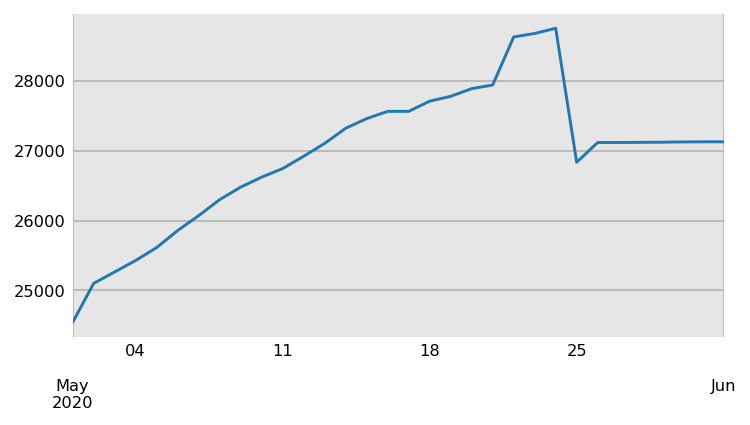

In [142]:
import matplotlib.pyplot as plt
plt.style.use('dashboard.mplstyle')
world_deaths.loc['2020-05-01':'2020-06-01', 'Spain'].plot();

It appears that almost no new deaths are reported after the sudden decrease on May 25th, until a huge increase in the latter half of June, followed again by a period of very few deaths. Various other data aggregators have reported similar issues with Spain's data.

We'll provide a simple solution so that all dates have a value greater than or equal to the prior day's values. In order to have make this replacement, we'll change all the values for dates below the current maximum to missing values with the `mask` method. First, we create a boolean mask, a Series of booleans with the same length as the original Series that meet some criteria.

In [ ]:
spain = world_deaths['Spain']
mask = spain < spain.cummax()
mask.tail()

We pass this Series to the `mask` method to "mask" them - cover them up and replace them with missing values. We show the first 10 dates where the data is now missing.

In [ ]:
spain_masked = spain.mask(mask)
spain_masked[spain_masked.isna()].head(10)

We can then linearly interpolate the missing values with the `interpolate` method and plot the updated data.

In [ ]:
spain_masked.interpolate().plot();

This "fixes" the data such that each value is always at least as large as the preceding value. In this particular example, this simple fix doesn't seem to connect the points in a way pleasing to the eye. A better estimation might linearly interpolate from the middle of May to the middle of July. 

Instead of developing a more complex method to fix bad data, we'll use this simple method and complete a process called **smoothing** later on, which will really help out the model handle these uneven jumps in the data.

### Fixing all bad data

Let's fix all of the bad data in our DataFrame with the same logic from above, rounding the totals to whole numbers.

In [ ]:
mask = world_deaths < world_deaths.cummax()
world_deaths_fixed = world_deaths.mask(mask).interpolate().round(0).astype('int64')
world_deaths_fixed.tail(3)

Let's verify that all values are at least as large as the previous day's value.

In [ ]:
mask = world_deaths_fixed < world_deaths_fixed.cummax()
mask.sum().sum()

### Exercise 14

<span style="color:green; font-size:16px">Write a function that accepts a single DataFrame and fixes all the bad data.</span>

In [ ]:
def fix_bad_data(df):
    """
    Replaces all days for each country where the value of
    deaths/cases is lower than the current maximum
    
    Parameters
    ----------
    df : DataFrame
    
    Returns
    -------
    DataFrame
    """
    pass

### Exercise 15

<span style="color:green; font-size:16px">Update the `run` function to include the above step.</span>

In [ ]:
def run6():
    """
    Run all cleaning and transformation steps
    
    Returns
    -------
    Dictionary of DataFrames
    """
    pass

Verify that this last step works:

In [ ]:
from solutions import run6
data = run6()
data['world_cases'].head(3)

## Data preparation complete

These steps complete the data preparation process. Let's use one of our previous functions to write this prepared data to the `data/prepared` folder.

In [ ]:
from solutions import write_data
write_data(data, 'data/prepared', index=True, index_label='date')

## Encapsulate all steps into a single class

All of the steps in the last two chapters may be encapsulated into a single class.

### Exercise 16

<span style="color:green; font-size:16px">Write a class that has a method for each of the steps from the last two chapter. Add a `run` method that runs all of the steps and returns the dictionary of DataFrames. Initialize the object with the `download_new` boolean, which allows the user to decide whether to download new data from the online repository or read in the local data. Check the `prepare.py` file for the solution.</span>

In [ ]:
class PrepareData:
    def __init__(self, download_new=True):
        self.download_new = download_new

To check your work run the following code:

In [ ]:
from prepare import PrepareData
prepare_data = PrepareData()
data = prepare_data.run()
data['world_deaths'].head()